In [1]:
# ------------------------------ IMPORTS ----------------------------------------- #

# Built-in 
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap

from astropy.io import fits
from scipy.optimize import curve_fit
import mpl_scatter_density
from scipy.stats import binned_statistic

# Own Libs
sys.path.append("/home/pablo/Desktop/TuMag/TuMags_Reduction_Pipeline")
import config as cf
from utils import read_Tumag
from field_stop_finder import compute_alignment, apply_fieldstop_and_align_array
from master_dark import compute_master_darks
from master_flatfield import compute_master_flat_field
import image_handler as ih
from demodulation import demodulate
from vlos import cog_profile
from xtalk import compute_xtalk

In [2]:
data_file = "Minimum_success_2_02.fits"
data = fits.getdata(data_file)

In [3]:
np.shape(data)

(2, 8, 4, 2016, 2016)

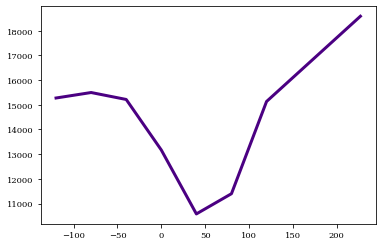

In [4]:
plt.plot(cf.om_config["2.02"]["lambda_array"], np.mean(data[0, :, 0], axis = (1, 2)), c = 'indigo', lw = 3)


info = cf.om_config["2.02"]


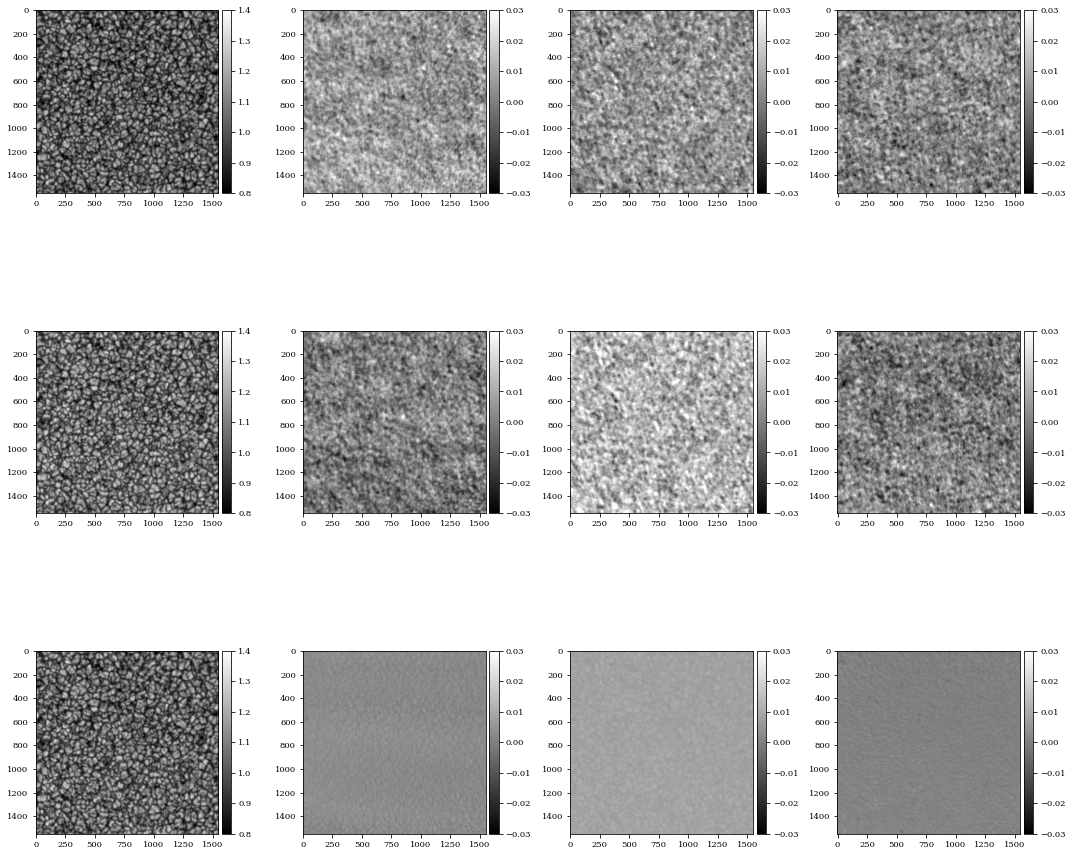

In [5]:

demod, dual = demodulate(data[:, -1], 2016, 2016, info["Nmods"], info["Nlambda"], filt = "525.02", mode = 'standard_single_wavelength') 


fig, axs = plt.subplots(3, 4, figsize = (15, 14))

norm = np.median(demod[0, 0, 300:-300, 300:-300])


im = axs[0, 0].imshow(demod[0, 0, 200:1750, 200:1750] / norm, cmap = "gray", vmin = 0.8, vmax = 1.4)
divider = make_axes_locatable(axs[0, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[0, 1].imshow(demod[0, 1, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[0, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[0, 2].imshow(demod[0, 2, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[0, 3].imshow(demod[0, 3, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[0, 3])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

im = axs[1, 0].imshow(demod[1, 0, 200:1750, 200:1750] / norm, cmap = "gray", vmin = 0.8, vmax = 1.4)
divider = make_axes_locatable(axs[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[1, 1].imshow(demod[1, 1, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[1, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[1, 2].imshow(demod[1, 2, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[1, 2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[1, 3].imshow(demod[1, 3, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[1, 3])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

im = axs[2, 0].imshow(dual[0, 200:1750, 200:1750] / norm, cmap = "gray", vmin = 0.8, vmax = 1.4)
divider = make_axes_locatable(axs[2, 0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[2, 1].imshow(dual[1, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[2, 1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[2, 2].imshow(dual[2, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[2, 2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[2, 3].imshow(dual[3, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[2, 3])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

23000.419074399528
[1.99694242e-03 1.13425428e+02]


/home/pablo/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/pablo/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


23769.017758055434
[ 9.31735056e-03 -3.07550690e+02]
23000.419074399528
[ 1.82762002e-02 -4.11499172e+02]
23769.017758055434
[-2.35748456e-03  4.19927037e+02]
23000.419074399528
[-1.25371844e-02  3.97996927e+02]
23769.017758055434
[ 1.43370382e-02 -4.39563583e+02]


'\nfig, axs = plt.subplots(1, 4, figsize = (20, 5))\n\nnorm = np.median(dual[0, 300:-300, 300:-300])\n\nim = axs[0].imshow(demod[0, 0, 200:1750, 200:1750] / norm, cmap = "gray")\ndivider = make_axes_locatable(axs[0])\ncax = divider.append_axes("right", size="5%", pad=0.05)\nplt.colorbar(im, cax=cax)\nim = axs[1].imshow(demod[0, 1, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0, vmax = 0.03)\ndivider = make_axes_locatable(axs[1])\ncax = divider.append_axes("right", size="5%", pad=0.05)\nplt.colorbar(im, cax=cax)\nim = axs[2].imshow(corr[200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)\ndivider = make_axes_locatable(axs[2])\ncax = divider.append_axes("right", size="5%", pad=0.05)\nplt.colorbar(im, cax=cax)\nim = axs[3].imshow(corr[200:1750, 200:1750]/ norm - demod[0, 1, 200:1750, 200:1750]/ norm, cmap = "Spectral")\ndivider = make_axes_locatable(axs[3])\ncax = divider.append_axes("right", size="5%", pad=0.05)\nplt.colorbar(im, cax=cax)\n\n\nfor i in range(4):\n

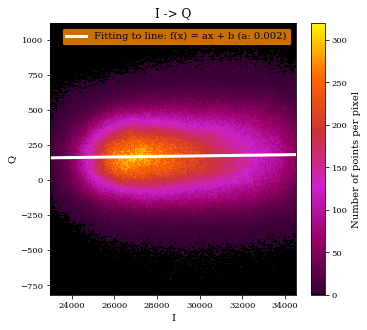

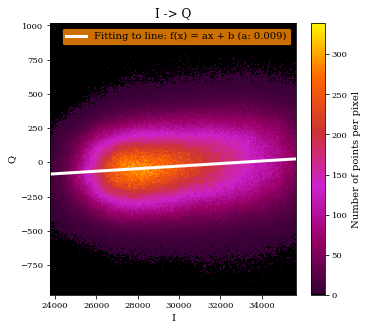

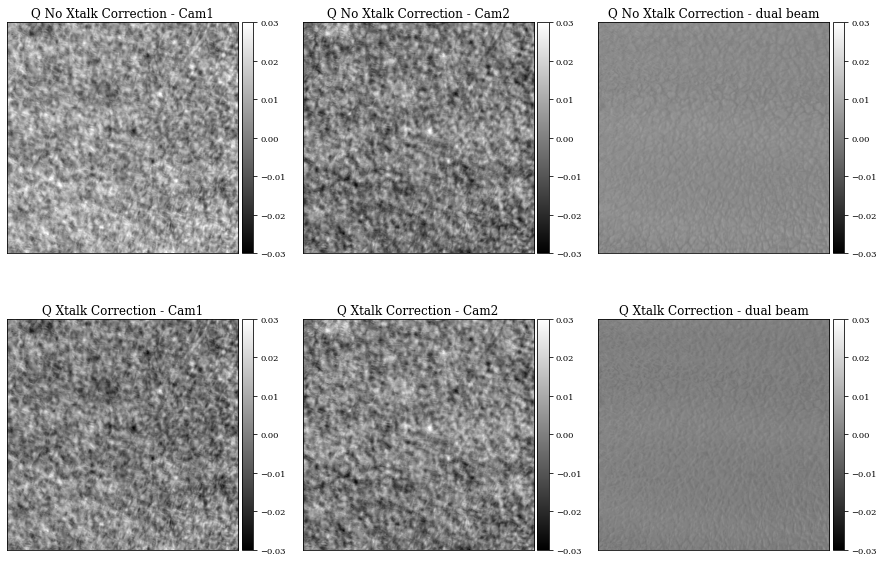

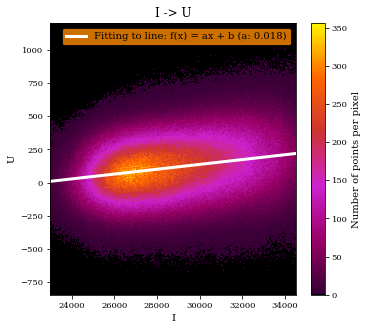

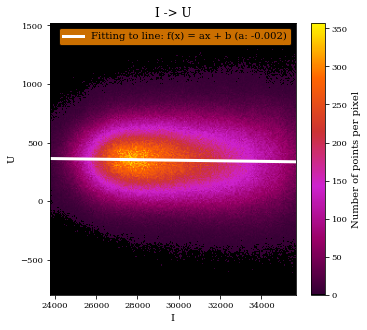

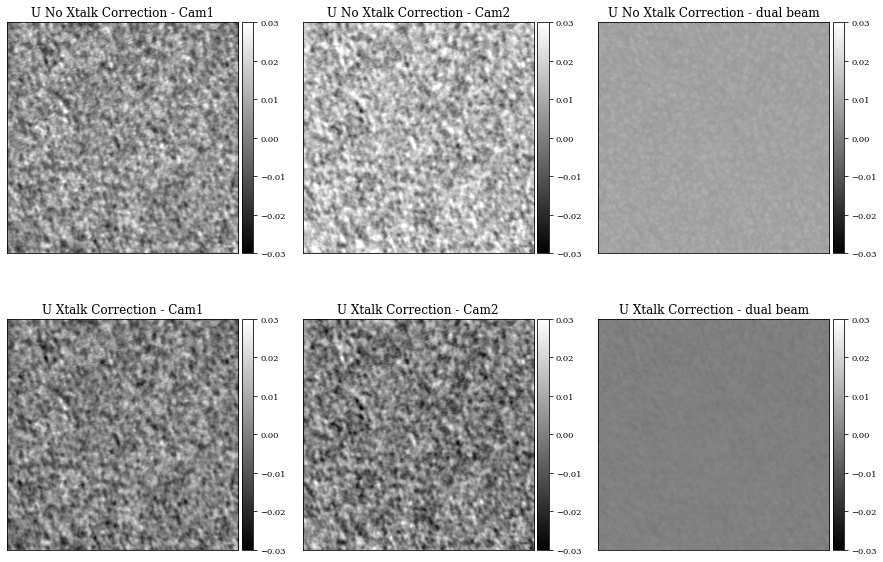

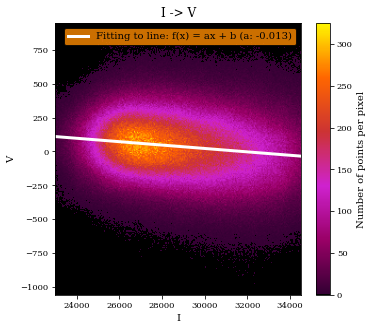

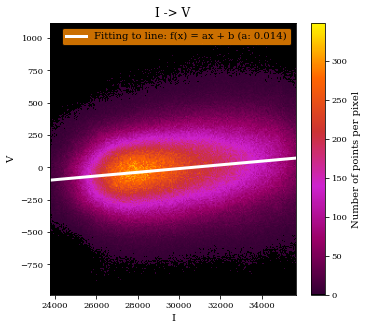

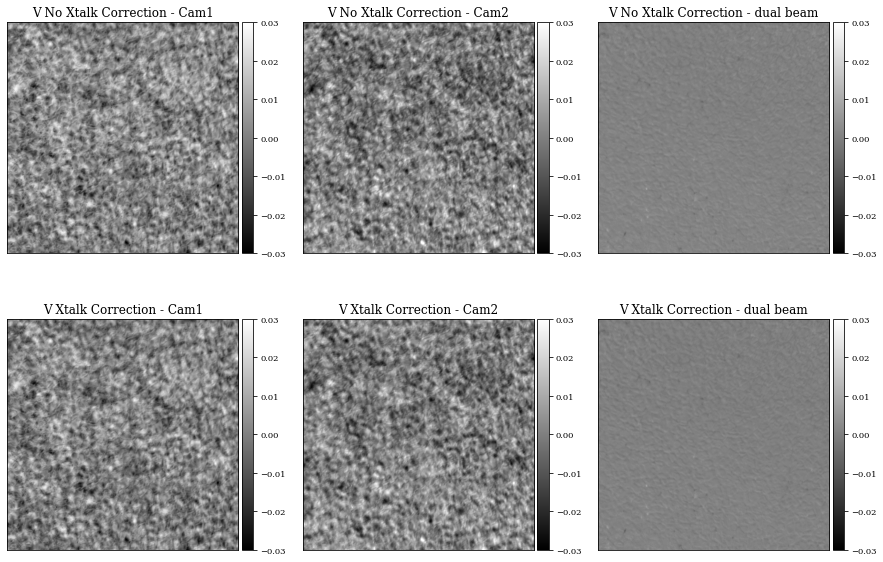

In [6]:
# X-Talk analysis


x_talk_corrected = np.zeros(np.shape(dual))
x_talk_corrected[0] = dual[0] 

for ind, stk in enumerate(["Q", "U", "V"]):

    ind += 1
    cam1 = compute_xtalk(demod[0], "I", stk)
    cam2 = compute_xtalk(demod[1], "I", stk)

    x_talk_corrected[ind] = cam1 * 0.5 + cam2 * 0.5

    fig, axs = plt.subplots(3, 3, figsize = (15, 15))
   

    #axs[0, 0].set_title("I")
    #axs[0, 0].imshow(dual[0, 200:1750, 200:1750]/norm, cmap = 'gray')
    #divider = make_axes_locatable(axs[0, 0])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    #plt.colorbar(im, cax=cax)



    axs[0, 0].set_title(f"{stk} No Xtalk Correction - Cam1")
    axs[0, 0].imshow(demod[0, ind, 200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[0, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[1, 0].set_title(f"{stk} Xtalk Correction - Cam1")
    axs[1, 0].imshow(cam1[200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[1, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[2, 0].set_title(f"{stk} Xtalk Correction difference - C1")
    axs[2, 0].imshow(cam1[200:1750, 200:1750]/norm - demod[0, ind, 200:1750, 200:1750]/norm,
                      cmap = 'Spectral')
    divider = make_axes_locatable(axs[2, 0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)


    axs[0, 1].set_title(f"{stk} No Xtalk Correction - Cam2")
    axs[0, 1].imshow(demod[1, ind, 200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[0, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[1, 1].set_title(f"{stk} Xtalk Correction - Cam2")
    axs[1, 1].imshow(cam2[200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[1, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[2, 1].set_title(f"{stk} Xtalk Correction difference - C1")
    axs[2, 1].imshow(cam2[200:1750, 200:1750]/norm - demod[1, ind, 200:1750, 200:1750]/norm,
                      cmap = 'Spectral')
    divider = make_axes_locatable(axs[2, 1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[0, 2].set_title(f"{stk} No Xtalk Correction - dual beam")
    axs[0, 2].imshow(dual[ind, 200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[0, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[1, 2].set_title(f"{stk} Xtalk Correction - dual beam")
    axs[1, 2].imshow(x_talk_corrected[ind, 200:1750, 200:1750]/norm, cmap = 'gray', vmin = -0.03, vmax = 0.03)
    divider = make_axes_locatable(axs[1, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

    axs[2, 2].set_title(f"{stk} Xtalk Correction difference - C1")
    axs[2, 2].imshow(x_talk_corrected[ind, 200:1750, 200:1750]/norm - dual[ind, 200:1750, 200:1750]/norm,
                      cmap = 'Spectral')
    divider = make_axes_locatable(axs[2, 2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)


    for i in range(3):
        for j in range(2):
            axs[j, i].set_xticks([])
            axs[j, i].set_yticks([])



    plt.tight_layout()









"""
fig, axs = plt.subplots(1, 4, figsize = (20, 5))

norm = np.median(dual[0, 300:-300, 300:-300])

im = axs[0].imshow(demod[0, 0, 200:1750, 200:1750] / norm, cmap = "gray")
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[1].imshow(demod[0, 1, 200:1750, 200:1750] / norm, cmap = "gray", vmin = -0, vmax = 0.03)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[2].imshow(corr[200:1750, 200:1750] / norm, cmap = "gray", vmin = -0.03, vmax = 0.03)
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
im = axs[3].imshow(corr[200:1750, 200:1750]/ norm - demod[0, 1, 200:1750, 200:1750]/ norm, cmap = "Spectral")
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)


for i in range(4):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.tight_layout()"""

In [7]:
np.shape(demod)

(2, 4, 2016, 2016)

In [8]:
np.shape(dual)

(4, 2016, 2016)

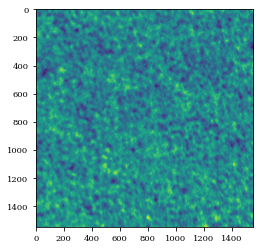

In [9]:
plt.imshow(cam2[200:1750, 200:1750] )

In [10]:
np.max((cam1[200:1750, 200:1750] * 0.5 + cam1[200:1750, 200:1750] * 0.5))

920.4273341201813